In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt 

In [37]:
lasso_results = {}
stols_results = {}
sample_sizes = [500, 1000, 1500, 2000, 3000, 5000, 10000, 15000]
for n in sample_sizes:
    lasso_results[n] = []
    stols_results[n] = [] 
    for t in range(1000):
        fpath = os.path.join("/home/gridsan/rpathak/with_cong/lasso_simulation/results", "result_n_{}_trial_{}.log".format(n, t))
        if os.path.exists(fpath):
            with open(fpath, "r") as f:
                result = f.readlines()
                lasso_results[n].append(float(result[0].split(':')[1].strip()))
                stols_results[n].append(float(result[1].split(':')[1].strip()))

In [38]:
mean_lasso_results = []
mean_stols_results = []
for n in sample_sizes:
    mean_lasso_results.append(np.mean(lasso_results[n]))
    mean_stols_results.append(np.mean(stols_results[n]))

In [39]:
mean_stols_results

[0.6999303742343723,
 0.5330415628990031,
 0.4492763655342882,
 0.40377556766207445,
 0.346360063400344,
 0.29823794804540243,
 0.21420373860385328,
 0.17344484064445867]

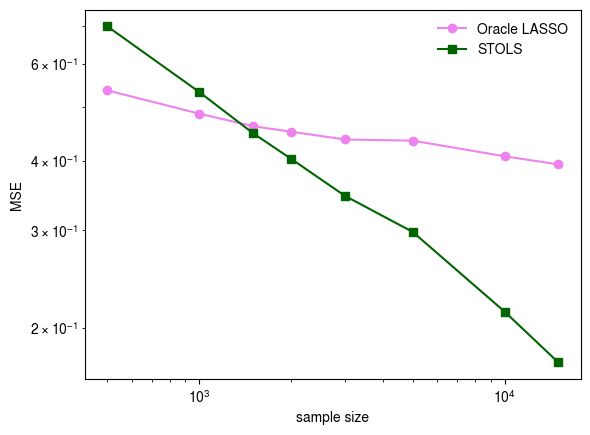

In [40]:
plt.rcParams["font.family"] = "Nimbus Sans"
plt.loglog(sample_sizes, mean_lasso_results, label="Oracle LASSO", marker = 'o', color='violet')
plt.loglog(sample_sizes, mean_stols_results, label="STOLS", marker='s', color='darkgreen')
plt.legend(frameon=False)
plt.xlabel('sample size')
plt.ylabel('MSE')
plt.savefig("f-lasso_vs_stols.pdf")

In [51]:
num_sample_sizes = len(sample_sizes)
sample_full = np.ones((num_sample_sizes, 2))
sample_full[:, 0] =  np.log(sample_sizes) 
lasso_rate = np.linalg.lstsq(sample_full, np.log(mean_lasso_results), rcond=None)[0][0]
stols_rate = np.linalg.lstsq(sample_full, np.log(mean_stols_results), rcond=None)[0][0]
print(lasso_rate)
print(stols_rate)

-0.08255579926229704
-0.4003059279638133


log_lasso_full